In [234]:
import sys 
sys.path.append('../') 
from data.dataloader import NumpyMetaDataset 
import matplotlib.pyplot as plt
import numpy as np
import torch   
print("cuda.is_available(): ", torch.cuda.is_available())

cuda.is_available():  False


In [235]:
num_colors = 110
base_colormap = plt.cm.get_cmap("tab20", 20)
num_repeats = int(np.ceil(num_colors / 20.0))

colors = []
for i in range(num_colors):
    base_color = base_colormap(i % 20)
    factor = 1 - 0.5 * (i // 20) / num_repeats
    color = [channel * factor for channel in base_color[:3]]
    colors.append(tuple(color + [1.0]))
 
colormap = plt.cm.get_cmap("coolwarm", num_colors)
heat_colors = [colormap(i) for i in range(num_colors)]

/tmp/ipykernel_1007128/1625332379.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  base_colormap = plt.cm.get_cmap("tab20", 20)
/tmp/ipykernel_1007128/1625332379.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("coolwarm", num_colors)


In [248]:
device = 'cpu'

def dataloader_analysis(datapartition):
    
    dataloader = NumpyMetaDataset(
        meg_dir = '/gpfs/gibbs/pi/krishnaswamy_smita/fmri-meg/meg/samples_240/' + datapartition, 
        fmri_dir =  '/gpfs/gibbs/pi/krishnaswamy_smita/fmri-meg/fmri/samples_30/' + datapartition, 
        n_way = 95, 
        batch_size = 1, 
        shuffle=True
    )  

    for it, (xm, xf, y_meta, y_batch, [time, sub_f, sub_m]) in enumerate(dataloader): break
        
    xm = torch.stack([torch.from_numpy(arr) for arr in xm]).squeeze(1) #.to(device)
    xf = torch.stack([torch.from_numpy(arr) for arr in xf]).squeeze(1) #.to(device)
    xm, xf = xm.float(), xf.float()  
    print('sub_f: # of sub. ', len(dataloader.meg_subs), ':', dataloader.meg_subs)
    print('sub_m: # of sub. ', len(dataloader.fmri_subs), ':', dataloader.fmri_subs) 
    
    xm = torch.nn.functional.normalize(xm, p=2.0, dim=-1) 
    xf = torch.nn.functional.normalize(xf, p=2.0, dim=-1)  
      
#     time, sub_f, sub_m = [], [], []
#     for it, (xm, xf, y_meta, y_batch, [time_k, sub_f_k, sub_m_k]) in enumerate(dataloader):  
#         time.append(y_batch)
#         sub_f.append(sub_f_k)
#         sub_m.append(sub_m_k) 
#         if it == 20: break 
#     print('sub_f: ', len(set(sub_f)), ':', set(sub_f))
#     print('sub_m: ', len(set(sub_m)), ':', set(sub_m))  
    return xm, xf, y_meta, y_batch

print('--------------------------------------- test subjests -------------------------------------------------') 
dataloader_analysis(datapartition='test/')
print('-------------------------------------- train subjests -------------------------------------------------')
xm, xf, y_meta, y_batch = dataloader_analysis(datapartition='train/')
print('-------------------------------------------------------------------------------------------------------')

print('xm: ', xm.shape)
print('xf: ', xf.shape)
print('y_batch: ', len(y_batch))
print('y_meta: ', len(y_meta))
print('-------------------------------------------------------------------------------------------------------')

--------------------------------------- test subjests -------------------------------------------------
sub_f: # of sub.  1 : ['sub-11']
sub_m: # of sub.  2 : ['sub-03', 'sub-17']
-------------------------------------- train subjests -------------------------------------------------
sub_f: # of sub.  9 : ['sub-03', 'sub-08', 'sub-02', 'sub-07', 'sub-06', 'sub-05', 'sub-04', 'sub-09', 'sub-10']
sub_m: # of sub.  12 : ['sub-02', 'sub-06', 'sub-05', 'sub-16', 'sub-04', 'sub-09', 'sub-10', 'sub-15', 'sub-14', 'sub-19', 'sub-20', 'sub-18']
-------------------------------------------------------------------------------------------------------
xm:  torch.Size([95, 240, 20484])
xf:  torch.Size([95, 30, 20484])
y_batch:  95
y_meta:  95
-------------------------------------------------------------------------------------------------------


In [249]:
def x_viz_fun(x, method = 'phate', comment='text', colored=True, heat = True): 
    if heat:
        colors_list = heat_colors
    else:
        colors_list = colors 
        
    batch_size, num_samples, dim = x.shape
    plt.figure(figsize=(6, 6))
    plt.rcParams.update({'font.size': 9})
    
    if method == 'phate':
        x2d = phate.PHATE(verbose = False).fit_transform(x.detach().reshape(-1, x.shape[-1]))
    elif method == 'pca':
        x2d = PCA(2).fit_transform(x.detach().reshape(-1, x.shape[-1]).numpy())    
        
    if colored:    
        x2d = torch.tensor(x2d).unsqueeze(1).view(batch_size, num_samples, -1)
        for t in range(batch_size): 
            x2d_t = x2d[t,  :]
            plt.scatter(x2d_t[:, 0], x2d_t[:, 1], marker="o", s=6 , color=colors_list[t], alpha=0.7)
    else:
        plt.scatter(z_viz[:, 0], z_viz[:, 1], marker="o", s=15, color='blue', alpha=0.1)
         
    plt.xlabel('Phate 1', fontsize=12)
    plt.ylabel('Phate 2', fontsize=12)
    plt.title(comment, fontsize=12)
    plt.show
    
    return x2d

/gpfs/gibbs/project/krishnaswamy_smita/aa2793/conda_envs/pytorch_fmri/lib/python3.9/site-packages/phate/phate.py:186: FutureWarning: k is deprecated. Please use knn in future.
  warnings.warn("k is deprecated. Please use knn in future.", FutureWarning)


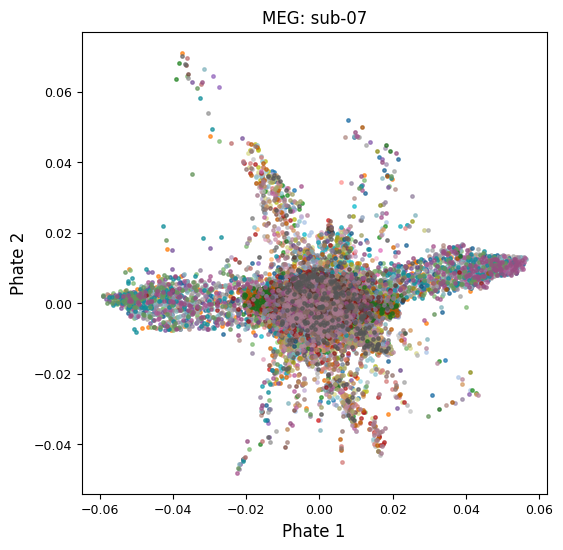

In [252]:
xm_2d = x_viz_fun(x = xm, method = 'phate', comment = 'MEG: ' + sub_m[0], colored = True, heat = False)

/gpfs/gibbs/project/krishnaswamy_smita/aa2793/conda_envs/pytorch_fmri/lib/python3.9/site-packages/phate/phate.py:186: FutureWarning: k is deprecated. Please use knn in future.
  warnings.warn("k is deprecated. Please use knn in future.", FutureWarning)


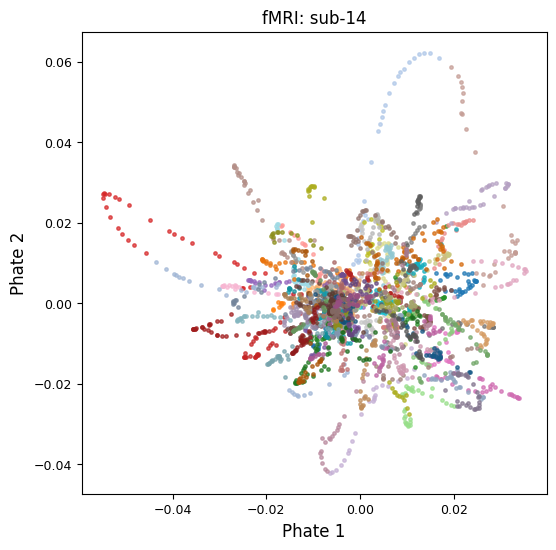

In [251]:
xf_2d = x_viz_fun(x = xf, method = 'phate', comment = 'fMRI: ' + sub_f[0], colored = True, heat = False)

In [240]:
def signal_2d_viz(x_2d):
    print("x_2d.shape", x_2d.shape)
    ncols = 5
    nrows = int(x_2d.shape[0]/ncols)-1
    data = torch.tensor(x_2d)  

    data = data.reshape(x_2d.shape[0], x_2d.shape[1], -1)  
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))

    time = 0
    for i in range(nrows):
        for j in range(ncols):
            x = data[time, :, :].numpy() 
            time += 1
            if j == 0:
                axs[i,j].plot(x[:, 0], color='red', alpha=0.6, linewidth=1)
            elif j == 1:
                axs[i,j].plot(x[:, 0], color='red', alpha=0.6, linewidth=1) 
            else:
                axs[i,j].plot(x[:, 0], color='red', alpha=0.6, linewidth=1) 
            axs[i,j].set_xlabel('')
            axs[i,j].set_ylabel('')

            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
            axs[i,j].spines['top'].set_alpha(0.2)
            axs[i,j].spines['right'].set_alpha(0.2)
            axs[i,j].spines['bottom'].set_alpha(0.2)
            axs[i,j].spines['left'].set_alpha(0.2)

            # axs[i,j].spines['top'].set_visible(False)
            # axs[i,j].spines['right'].set_visible(False)
            # axs[i,j].spines['bottom'].set_visible(False)
            # axs[i,j].spines['left'].set_visible(False)

    # show the plot
    plt.show()  

x_2d.shape torch.Size([95, 240, 2])


/tmp/ipykernel_1007128/113366765.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(x_2d)


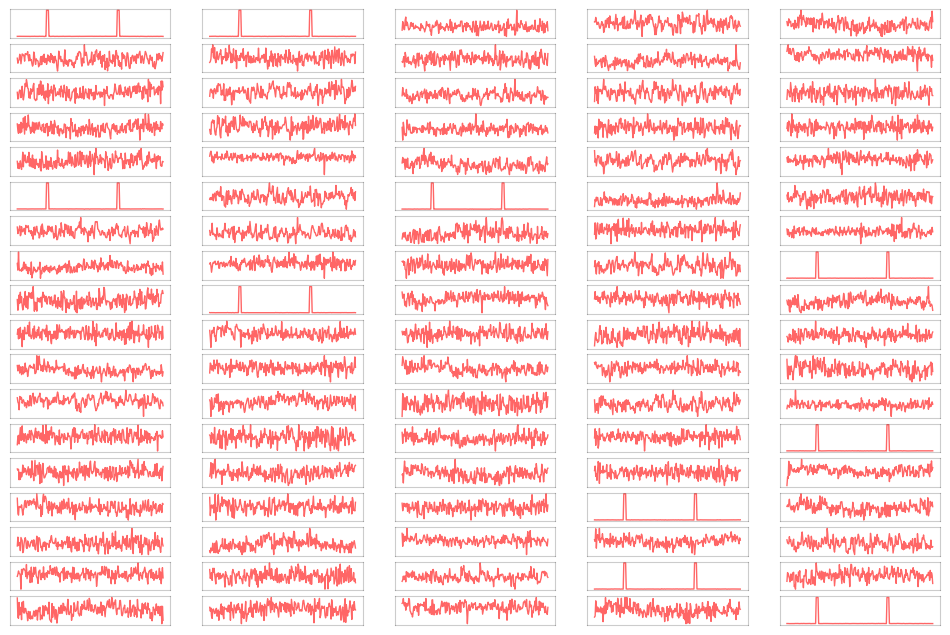

In [241]:
signal_2d_viz(xm_2d)

x_2d.shape torch.Size([95, 30, 2])


/tmp/ipykernel_1007128/113366765.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(x_2d)


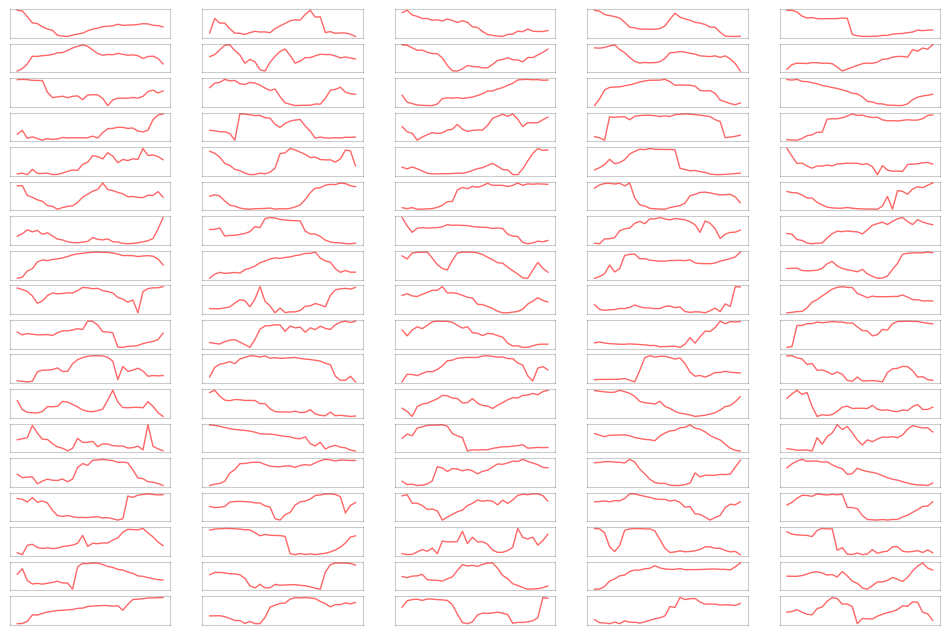

In [242]:
signal_2d_viz(xf_2d)